In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from numpy import nan
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [2]:
input_file = 'most-recent-cohorts-all-data-elements-1.csv'
column_template = 'column_heading_template.csv'
forbes_data = 'ForbesFrom MAtt_clean.csv'
#there were simply too many wierd columns in the original data set of columns.  I went in and deleted several
#in the master excel file and regenerated the column template.
column_template_2 = 'column_heading_template_new.csv'

path = './data/'
path2 = './data_documentation/'

In [3]:
column_headings_template_df = pd.read_csv(path2 +column_template_2)

In [4]:
column_headings_for_forbes_summary = column_headings_template_df['VARIABLE NAME'].to_list()
column_heading_df = column_headings_template_df
column_headings_for_forbes_summary

['CIP01BACHL',
 'CIP04BACHL',
 'CIP05BACHL',
 'CIP26BACHL',
 'CIP52BACHL',
 'CIP09BACHL',
 'CIP10BACHL',
 'CIP11BACHL',
 'CIP46BACHL',
 'CIP13BACHL',
 'CIP15BACHL',
 'CIP14BACHL',
 'CIP23BACHL',
 'CIP19BACHL',
 'CIP16BACHL',
 'CIP51BACHL',
 'CIP54BACHL',
 'CIP43BACHL',
 'CIP22BACHL',
 'CIP24BACHL',
 'CIP25BACHL',
 'CIP27BACHL',
 'CIP47BACHL',
 'CIP29BACHL',
 'CIP30BACHL',
 'CIP03BACHL',
 'CIP31BACHL',
 'CIP12BACHL',
 'CIP38BACHL',
 'CIP40BACHL',
 'CIP48BACHL',
 'CIP42BACHL',
 'CIP44BACHL',
 'CIP41BACHL',
 'CIP45BACHL',
 'CIP39BACHL',
 'CIP49BACHL',
 'CIP50BACHL',
 'PRGMOFR',
 'PCIP01',
 'PCIP04',
 'PCIP05',
 'PCIP26',
 'PCIP52',
 'PCIP09',
 'PCIP10',
 'PCIP11',
 'PCIP46',
 'PCIP13',
 'PCIP15',
 'PCIP14',
 'PCIP23',
 'PCIP19',
 'PCIP16',
 'PCIP51',
 'PCIP54',
 'PCIP43',
 'PCIP22',
 'PCIP24',
 'PCIP25',
 'PCIP27',
 'PCIP47',
 'PCIP29',
 'PCIP30',
 'PCIP03',
 'PCIP31',
 'PCIP12',
 'PCIP38',
 'PCIP40',
 'PCIP48',
 'PCIP42',
 'PCIP44',
 'PCIP41',
 'PCIP45',
 'PCIP39',
 'PCIP49',
 'PCIP50',


In [5]:
df = pd.read_csv(path+input_file, low_memory=False)

In [6]:
df

UNITID    OPEID  OPEID6                                    INSTNM  \
0       100654   100200    1002                  Alabama A & M University   
1       100663   105200    1052       University of Alabama at Birmingham   
2       100690  2503400   25034                        Amridge University   
3       100706   105500    1055       University of Alabama in Huntsville   
4       100724   100500    1005                  Alabama State University   
...        ...      ...     ...                                       ...   
6801  48511112   157114    1571         Georgia Military College - Dublin   
6802  48511113   157115    1571        Georgia Military College - Eastman   
6803  48616901  4204801   42048  American College of Barbering - Florence   
6804  49005401  4182601   41826      HCI College - Fort Lauderdale Campus   
6805  49146401  4227001   42270          ABC Adult School - Cabrillo Lane   

                 CITY STABBR         ZIP  \
0              Normal     AL       35762   
1          Birmingham     AL  35294-0110   
2          Montgomery     AL  36117-3553   
3          Huntsville     AL       35899   
4          Montgomery     AL  36104-0271   
...               ...    ...         ...   
6801           Dublin     GA   310215149   
6802          Eastman     GA   310236109   
6803         Florence     KY   410421801   
6804  Fort Lauderdale     FL       33309   
6805         Cerritos     CA   907037748   

                                           ACCREDAGENCY  \
0     Southern Association of Colleges and Schools C...   
1     Southern Association of Colleges and Schools C...   
2     Southern Association of Colleges and Schools C...   
3     Southern Association of Colleges and Schools C...   
4     Southern Association of Colleges and Schools C...   
...                                                 ...   
6801  Southern Association of Colleges and Schools C...   
6802  Southern Association of Colleges and Schools C...   
6803  National Accrediting Commission of Career Arts...   
6804  Accrediting Commission of Career Schools and C...   
6805                  Council on Occupational Education   

                            INSTURL  \
0                     www.aamu.edu/   
1               https://www.uab.edu   
2         www.amridgeuniversity.edu   
3                       www.uah.edu   
4                     www.alasu.edu   
...                             ...   
6801  https://www.gmc.edu/index.cms   
6802  https://www.gmc.edu/index.cms   
6803                            NaN   
6804                   www.hci.edu/   
6805                            NaN   

                                                 NPCURL  ...  \
0     www.aamu.edu/admissions-aid/tuition-fees/net-p...  ...   
1      https://uab.studentaidcalculator.com/survey.aspx  ...   
2                      www2.amridgeuniversity.edu:9091/  ...   
3                                       finaid.uah.edu/  ...   
4     www.alasu.edu/cost-aid/tuition-costs/net-price...  ...   
...                                                 ...  ...   
6801                                                NaN  ...   
6802                                                NaN  ...   
6803                                                NaN  ...   
6804                                                NaN  ...   
6805                                                NaN  ...   

      OMENRUP_PARTTIME_POOLED_SUPP  FTFTPCTPELL  FTFTPCTFLOAN   UG12MN  \
0                           0.3193       0.7057        0.7143   5343.0   
1                           0.2475       0.3788        0.5350  14445.0   
2                           0.2836       1.0000        1.0000    440.0   
3                           0.2496       0.2707        0.4556   8145.0   
4                           0.2621       0.7792        0.7539   4732.0   
...                            ...          ...           ...      ...   
6801                           NaN          NaN           NaN      NaN   
6802           

In [7]:
df.loc[1,'UNITID']

100663

In [8]:
df['UGDS']

0        4990.0
1       13186.0
2         351.0
3        7458.0
4        3903.0
         ...   
6801        NaN
6802        NaN
6803        NaN
6804        NaN
6805        NaN
Name: UGDS, Length: 6806, dtype: float64

In [9]:
len(df)

6806

In [10]:
df.replace(to_replace = 'PrivacySuppressed', value = nan, inplace = True)

In [11]:
df.loc[df['OPEID6'] == 21997, 'MN_EARN_WNE_P8']

23    NaN
Name: MN_EARN_WNE_P8, dtype: object

In [12]:
column_heading_df = pd.read_csv(path2 + column_template_2)

In [13]:
column_heading_df

dev-category                               NAME OF DATA ELEMENT  \
0      academics  Bachelor's degree in Agriculture, Agriculture ...   
1      academics  Bachelor's degree in Architecture And Related ...   
2      academics  Bachelor's degree in Area, Ethnic, Cultural, G...   
3      academics  Bachelor's degree in Biological And Biomedical...   
4      academics  Bachelor's degree in Business, Management, Mar...   
..           ...                                                ...   
408      student  Total share of enrollment of undergraduate stu...   
409      student                 Unemployment rate, via Census data   
410          aid  Median loan debt of completers in monthly paym...   
411          NaN                                                NaN   
412          aid    The median debt for students who have completed   

                      developer-friendly name API data type      VARIABLE NAME  
0               program.bachelors.agriculture       integer         CIP01BACHL  
1              program.bachelors.architecture       integer         CIP04BACHL  
2    program.bachelors.ethnic_cultural_gender       integer         CIP05BACHL  
3                program.bachelors.biological       integer         CIP26BACHL  
4        program.bachelors.business_marketing       integer         CIP52BACHL  
..                                        ...           ...                ...  
408  demographics.race_ethnicity.unknown_2000         float            UG_UNKN  
409                 demographics.unemployment         float         UNEMP_RATE  
410   median_debt.completers.monthly_payments         float  GRAD_DEBT_MDN10YR  
411                                       NaN           NaN      OVERALL_YR6_N  
412            median_debt.completers.overall         float      GRAD_DEBT_MDN  

[413 rows x 5 columns]

In [14]:
complete_variable_name_list = df.columns.to_list()
complete_variable_name_list

['UNITID',
 'OPEID',
 'OPEID6',
 'INSTNM',
 'CITY',
 'STABBR',
 'ZIP',
 'ACCREDAGENCY',
 'INSTURL',
 'NPCURL',
 'SCH_DEG',
 'HCM2',
 'MAIN',
 'NUMBRANCH',
 'PREDDEG',
 'HIGHDEG',
 'CONTROL',
 'ST_FIPS',
 'REGION',
 'LOCALE',
 'LOCALE2',
 'LATITUDE',
 'LONGITUDE',
 'CCBASIC',
 'CCUGPROF',
 'CCSIZSET',
 'HBCU',
 'PBI',
 'ANNHI',
 'TRIBAL',
 'AANAPII',
 'HSI',
 'NANTI',
 'MENONLY',
 'WOMENONLY',
 'RELAFFIL',
 'ADM_RATE',
 'ADM_RATE_ALL',
 'SATVR25',
 'SATVR75',
 'SATMT25',
 'SATMT75',
 'SATWR25',
 'SATWR75',
 'SATVRMID',
 'SATMTMID',
 'SATWRMID',
 'ACTCM25',
 'ACTCM75',
 'ACTEN25',
 'ACTEN75',
 'ACTMT25',
 'ACTMT75',
 'ACTWR25',
 'ACTWR75',
 'ACTCMMID',
 'ACTENMID',
 'ACTMTMID',
 'ACTWRMID',
 'SAT_AVG',
 'SAT_AVG_ALL',
 'PCIP01',
 'PCIP03',
 'PCIP04',
 'PCIP05',
 'PCIP09',
 'PCIP10',
 'PCIP11',
 'PCIP12',
 'PCIP13',
 'PCIP14',
 'PCIP15',
 'PCIP16',
 'PCIP19',
 'PCIP22',
 'PCIP23',
 'PCIP24',
 'PCIP25',
 'PCIP26',
 'PCIP27',
 'PCIP29',
 'PCIP30',
 'PCIP31',
 'PCIP38',
 'PCIP39',
 'PCIP40',

In [15]:
filtered_variable_name_list = column_heading_df['VARIABLE NAME'].unique().tolist()
#filtered_variable_name_list.append('UGDS')

In [16]:
filtered_df = df[filtered_variable_name_list].copy()


In [17]:
#for variable in complete_variable_name_list:
#    if variable not in filtered_variable_name_list:
#        filtered_df.drop(columns = variable, inplace = True)

In [18]:
filtered_df

CIP01BACHL  CIP04BACHL  CIP05BACHL  CIP26BACHL  CIP52BACHL  CIP09BACHL  \
0            1.0         1.0         0.0         1.0         2.0         0.0   
1            0.0         0.0         1.0         1.0         2.0         1.0   
2            0.0         0.0         0.0         0.0         2.0         0.0   
3            0.0         0.0         0.0         1.0         1.0         1.0   
4            0.0         0.0         0.0         1.0         1.0         1.0   
...          ...         ...         ...         ...         ...         ...   
6801         NaN         NaN         NaN         NaN         NaN         NaN   
6802         NaN         NaN         NaN         NaN         NaN         NaN   
6803         NaN         NaN         NaN         NaN         NaN         NaN   
6804         NaN         NaN         NaN         NaN         NaN         NaN   
6805         NaN         NaN         NaN         NaN         NaN         NaN   

      CIP10BACHL  CIP11BACHL  CIP46BACHL  CIP13BACHL  ...  UG_API  UG_BLACKNH  \
0            1.0         1.0         0.0         1.0  ...     NaN         NaN   
1            0.0         1.0         0.0         1.0  ...     NaN         NaN   
2            0.0         0.0         0.0         0.0  ...     NaN         NaN   
3            0.0         1.0         0.0         1.0  ...     NaN         NaN   
4            0.0         1.0         0.0         1.0  ...     NaN         NaN   
...          ...         ...         ...         ...  ...     ...         ...   
6801         NaN         NaN         NaN         NaN  ...     NaN         NaN   
6802         NaN         NaN         NaN         NaN  ...     NaN         NaN   
6803         NaN         NaN         NaN         NaN  ...     NaN         NaN   
6804         NaN         NaN         NaN         NaN  ...     NaN         NaN   
6805         NaN         NaN         NaN         NaN  ...     NaN         NaN   

      UG_HISPOLD  UG_NRA  UG_WHITENH  UG_UNKN        UNEMP_RATE  \
0            NaN     NaN         NaN      NaN  4.84000015258789   
1            NaN     NaN         NaN      NaN  3.45000004768371   
2            NaN     NaN         NaN      NaN  3.59999990463256   
3            NaN     NaN         NaN      NaN  3.64000010490417   
4            NaN     NaN         NaN      NaN  4.80999994277954   
...          ...     ...         ...      ...               ...   
6801         NaN     NaN         NaN      NaN               NaN   
6802         NaN     NaN         NaN      NaN               NaN   
6803         NaN     NaN         NaN      NaN               NaN   
6804         NaN     NaN         NaN      NaN               NaN   
6805         NaN     NaN         NaN      NaN               NaN   

      GRAD_DEBT_MDN10YR  OVERALL_YR6_N  GRAD_DEBT_MDN  
0      358.051635276573           1320          34500  
1      233.511936049938           2590          22500  
2      259.478463338692            144          25002  
3      228.540726389142           1129          22021  
4      338.716846971638           1398          32637  
...                 ...            ...            ...  
6801                NaN            NaN            NaN  
6802                NaN            NaN            NaN  
6803                NaN            NaN            NaN  
6804   181.558124855894            NaN          17494  
6805                NaN            NaN            NaN  

[6806 rows x 413 columns]

In [19]:
filtered_df.columns

Index(['CIP01BACHL', 'CIP04BACHL', 'CIP05BACHL', 'CIP26BACHL', 'CIP52BACHL',
       'CIP09BACHL', 'CIP10BACHL', 'CIP11BACHL', 'CIP46BACHL', 'CIP13BACHL',
       ...
       'UG_API', 'UG_BLACKNH', 'UG_HISPOLD', 'UG_NRA', 'UG_WHITENH', 'UG_UNKN',
       'UNEMP_RATE', 'GRAD_DEBT_MDN10YR', 'OVERALL_YR6_N', 'GRAD_DEBT_MDN'],
      dtype='object', length=413)

In [20]:
column_heading_df['dev-category'].unique()

array(['academics', 'admissions', 'aid', 'completion', 'cost', 'earnings',
       'repayment', 'root', 'school', 'student', nan], dtype=object)

In [21]:
#PREDEG == 3 is the university is predominately a 4 year school.
filtered_4_year_df = filtered_df.loc[df['PREDDEG'] == 3, :]
filtered_4_year_df

CIP01BACHL  CIP04BACHL  CIP05BACHL  CIP26BACHL  CIP52BACHL  CIP09BACHL  \
0            1.0         1.0         0.0         1.0         2.0         0.0   
1            0.0         0.0         1.0         1.0         2.0         1.0   
2            0.0         0.0         0.0         0.0         2.0         0.0   
3            0.0         0.0         0.0         1.0         1.0         1.0   
4            0.0         0.0         0.0         1.0         1.0         1.0   
...          ...         ...         ...         ...         ...         ...   
6299         0.0         0.0         0.0         0.0         0.0         0.0   
6314         0.0         0.0         0.0         0.0         0.0         0.0   
6318         0.0         0.0         0.0         0.0         0.0         0.0   
6319         0.0         0.0         0.0         1.0         2.0         1.0   
6322         0.0         0.0         0.0         0.0         2.0         0.0   

      CIP10BACHL  CIP11BACHL  CIP46BACHL  CIP13BACHL  ...  UG_API  UG_BLACKNH  \
0            1.0         1.0         0.0         1.0  ...     NaN         NaN   
1            0.0         1.0         0.0         1.0  ...     NaN         NaN   
2            0.0         0.0         0.0         0.0  ...     NaN         NaN   
3            0.0         1.0         0.0         1.0  ...     NaN         NaN   
4            0.0         1.0         0.0         1.0  ...     NaN         NaN   
...          ...         ...         ...         ...  ...     ...         ...   
6299         0.0         0.0         0.0         0.0  ...     NaN         NaN   
6314         0.0         0.0         0.0         0.0  ...     NaN         NaN   
6318         0.0         0.0         0.0         0.0  ...     NaN         NaN   
6319         0.0         0.0         0.0         1.0  ...     NaN         NaN   
6322         0.0         2.0         0.0         0.0  ...     NaN         NaN   

      UG_HISPOLD  UG_NRA  UG_WHITENH  UG_UNKN        UNEMP_RATE  \
0            NaN     NaN         NaN      NaN  4.84000015258789   
1            NaN     NaN         NaN      NaN  3.45000004768371   
2            NaN     NaN         NaN      NaN  3.59999990463256   
3            NaN     NaN         NaN      NaN  3.64000010490417   
4            NaN     NaN         NaN      NaN  4.80999994277954   
...          ...     ...         ...      ...               ...   
6299         NaN     NaN         NaN      NaN               NaN   
6314         NaN     NaN         NaN      NaN               NaN   
6318         NaN     NaN         NaN      NaN               NaN   
6319         NaN     NaN         NaN      NaN               NaN   
6322         NaN     NaN         NaN      NaN               NaN   

      GRAD_DEBT_MDN10YR  OVERALL_YR6_N  GRAD_DEBT_MDN  
0      358.051635276573           1320          34500  
1      233.511936049938           2590          22500  
2      259.478463338692            144          25002  
3      228.540726389142           1129          22021  
4      338.716846971638           1398          32637  
...                 ...            ...            ...  
6299                NaN            NaN            NaN  
6314                NaN            NaN            NaN  
6318                NaN            NaN            NaN  
6319                NaN            NaN            NaN  
6322                NaN            NaN            NaN  

[2058 rows x 413 columns]

In [22]:
filtered_4_year_df['OPEID'].dtypes

dtype('int64')

In [23]:
college_ranking_df = pd.read_csv(path2+forbes_data)


In [24]:
college_ranking_df['OPEID'].dtypes

dtype('int64')

In [25]:
college_ranking_df = college_ranking_df.fillna(0)

In [26]:
college_ranking_df['OPEID'] = college_ranking_df['OPEID'].astype('int')
college_ranking_df.head(51)

UNITID    OPEID  OPEID6  Rank                                       Name  \
0   166027   215500    2155     1                         Harvard University   
1   243744   130500    1305     2                        Stanford University   
2   130794   142600    1426     3                            Yale University   
3   166683   217800    2178     4      Massachusetts Institute of Technology   
4   186131   262700    2627     5                       Princeton University   
5   215062   337800    3378     6                 University of Pennsylvania   
6   217156   340100    3401     7                           Brown University   
7   110404   113100    1131     8         California Institute of Technology   
8   198419   292000    2920     9                            Duke University   
9   182670   257300    2573    10                          Dartmouth College   
10  190415   271100    2711    11                         Cornell University   
11  121345   117300    1173    12                             Pomona College   
12  110635   131200    1312    13         University of California, Berkeley   
13  190150   270700    2707    14                        Columbia University   
14  131496   144500    1445    15                      Georgetown University   
15  144050   177400    1774    16                      University of Chicago   
16  147767   173900    1739    17                    Northwestern University   
17  152080   184000    1840    18                   University of Notre Dame   
18  168342   222900    2229    19                           Williams College   
19  170976   232500    2325    20          University of Michigan, Ann Arbor   
20  227757   360400    3604    21                            Rice University   
21  162928   207700    2077    22                   Johns Hopkins University   
22  115409   117100    1171    23                        Harvey Mudd College   
23  216287   337000    3370    25                         Swarthmore College   
24  161004   203800    2038    26                            Bowdoin College   
25  221999   353500    3535    27                      Vanderbilt University   
26  164465   211500    2115    28                            Amherst College   
27  112260   117000    1170    29                  Claremont McKenna College   
28  123961   132800    1328    30          University of Southern California   
29  179867   252000    2520    31         Washington University in St. Louis   
30  234076   374500    3745    33                     University of Virginia   
31  168148   221900    2219    34                           Tufts University   
32  193900   278500    2785    35                        New York University   
33  230959   369100    3691    36                         Middlebury College   
34  211440   324200    3242    37                 Carnegie Mellon University   
35  110662   131500    1315    38      University of California, Los Angeles   
36  160977   203600    2036    39                              Bates College   
37  130697   142400    1424    40                        Wesleyan University   
38  164924   212800    2128    41                             Boston College   
39  234207   376800    3768    42              Washington and Lee University   
40  168218   222400    2224    44                          Wellesley College   
41  199120   297400    2974    45  University of North Carolina, Chapel Hill   
42  190099   270100    2701    46                         Colgate University   
43  231624   370500    3705    47                  College of William & Mary   
44  198385   291800    2918    48                           Davidson College   
45  212911   327400    3274    49                          Haverford College   
46  189097   270800    2708    50                            Barnard College   
47  243744  1305001    1305    51                     Santa Clara University   
48  173258   234000    2340    52                           Carleton College   
49  

In [27]:
college_ranking_df.columns.to_list()[10]

'Net Price'

In [28]:
college_ranking_df.loc[college_ranking_df['OPEID'].duplicated()]

Empty DataFrame
Columns: [UNITID, OPEID, OPEID6, Rank, Name, City, State, Public/Private, Undergraduate Population, Student Population, Net Price, Average Grant Aid, Total Annual Cost, Alumni Salary, Acceptance Rate, SAT Lower, SAT Upper, ACT Lower, ACT Upper, Website]
Index: []

In [29]:
len(college_ranking_df['UNITID'].unique())

630

In [30]:
#this will give us only the schools that have a rnaking from forbes and ones that we have on our list
filtered_ranking_4_year_df = filtered_4_year_df.merge(college_ranking_df, how = 'inner', on = 'OPEID')

In [31]:
filtered_ranking_4_year_df.columns

Index(['CIP01BACHL', 'CIP04BACHL', 'CIP05BACHL', 'CIP26BACHL', 'CIP52BACHL',
       'CIP09BACHL', 'CIP10BACHL', 'CIP11BACHL', 'CIP46BACHL', 'CIP13BACHL',
       ...
       'Net Price', 'Average Grant Aid', 'Total Annual Cost', 'Alumni Salary',
       'Acceptance Rate', 'SAT Lower', 'SAT Upper', 'ACT Lower', 'ACT Upper',
       'Website'],
      dtype='object', length=432)

In [32]:
filtered_ranking_4_year_df['Net Price']

0      17535
1      19986
2      21973
3      23416
4      22853
       ...  
634    13746
635    20605
636    10248
637    15376
638     9854
Name: Net Price, Length: 639, dtype: int64

In [33]:
filtered_ranking_4_year_df.columns

Index(['CIP01BACHL', 'CIP04BACHL', 'CIP05BACHL', 'CIP26BACHL', 'CIP52BACHL',
       'CIP09BACHL', 'CIP10BACHL', 'CIP11BACHL', 'CIP46BACHL', 'CIP13BACHL',
       ...
       'Net Price', 'Average Grant Aid', 'Total Annual Cost', 'Alumni Salary',
       'Acceptance Rate', 'SAT Lower', 'SAT Upper', 'ACT Lower', 'ACT Upper',
       'Website'],
      dtype='object', length=432)

In [34]:
#need to drop all text based columns
filtered_ranking_4_year_df = filtered_ranking_4_year_df.drop(columns = ['UNITID_x', 'OPEID6_x', 'Name','City','State','Public/Private','Website', 'OPEID', 'CITY', 'STABBR', 'ZIP', 'INSTURL'])

In [35]:
#lets also drop some nonsense columns like latitude, longitude, SCH_DEG, MAIN, PREDDEG, NUMBRANCH, REGION, ST_FIPS
#filtered_ranking_4_year_df = filtered_ranking_4_year_df.drop(columns = ['REGION','DEP_DEBT_MDN','IND_DEBT_MDN', 'MN_EARN_WNE_P7', 'MN_EARN_WNE_P8', 'MN_EARN_WNE_P10', 'ST_FIPS', 'MAIN', 'NUMBRANCH','LATITUDE','LONGITUDE'])

In [36]:
filtered_ranking_4_year_df

CIP01BACHL  CIP04BACHL  CIP05BACHL  CIP26BACHL  CIP52BACHL  CIP09BACHL  \
0           0.0         0.0         1.0         1.0         2.0         1.0   
1           0.0         0.0         0.0         1.0         1.0         1.0   
2           0.0         0.0         1.0         1.0         2.0         1.0   
3           1.0         1.0         0.0         1.0         1.0         1.0   
4           0.0         0.0         1.0         1.0         1.0         1.0   
..          ...         ...         ...         ...         ...         ...   
634         1.0         1.0         1.0         1.0         1.0         1.0   
635         0.0         0.0         0.0         0.0         0.0         0.0   
636         0.0         0.0         0.0         0.0         0.0         0.0   
637         0.0         0.0         0.0         1.0         1.0         1.0   
638         0.0         0.0         0.0         1.0         1.0         1.0   

     CIP10BACHL  CIP11BACHL  CIP46BACHL  CIP13BACHL  ...  Student Population  \
0           0.0         1.0         0.0         1.0  ...               20902   
1           0.0         1.0         0.0         1.0  ...                9101   
2           0.0         1.0         0.0         1.0  ...               38563   
3           0.0         1.0         0.0         1.0  ...               29776   
4           0.0         0.0         0.0         1.0  ...                1325   
..          ...         ...         ...         ...  ...                 ...   
634         0.0         1.0         0.0         1.0  ...               42699   
635         0.0         0.0         0.0         0.0  ...                 386   
636         0.0         0.0         0.0         0.0  ...                 885   
637         0.0         1.0         0.0         1.0  ...               15317   
638         0.0         1.0         0.0         1.0  ...               20811   

     Net Price  Average Grant Aid  Total Annual Cost  Alumni Salary  \
0        17535               9254              36800        87200.0   
1        19986               9587              36881       103900.0   
2        21973              16494              46744        97400.0   
3        23416               9030              49954       104500.0   
4        22853              26594              52414        88300.0   
..         ...                ...                ...            ...   
634      13746              10703              41614       110000.0   
635      20605              31845              65456            0.0   
636      10248               9341              43678        86500.0   
637      15376               4726              39434        80000.0   
638       9854               5483              28094        85600.0   

     Acceptance Rate  SAT Lower  SAT Upper  ACT Lower  ACT Upper  
0               92.0      990.0     1370.0       21.0       28.0  
1               81.0     1080.0     1330.0       25.0       31.0  
2               53.0     1050.0     1280.0       23.0       32.0  
3               84.0     1130.0     1310.0       24.0       30.0  
4               62.0     1030.0     1260.0       23.0       29.0  
..               ...        ...        ...        ...        ...  
634             57.0     1150.0     1380.0       25.0       31.0  
635             63.0     1190.0     1350.0       23.0       32.0  
636             69.0     1190.0     1380.0       25.0       30.0  
637             64.0     1060.0     1210.0       21.0       25.0  
638             78.0      910.0     1130.0       20.0       25.0  

[639 rows x 420 columns]

In [37]:
#the next few lines are simply to move the school rank to the first column
col_list = filtered_ranking_4_year_df.columns.to_list()

In [38]:
col_list.pop(col_list.index('Rank'))

'Rank'

In [39]:
col_list.insert(0, 'Rank')
col_list

['Rank',
 'CIP01BACHL',
 'CIP04BACHL',
 'CIP05BACHL',
 'CIP26BACHL',
 'CIP52BACHL',
 'CIP09BACHL',
 'CIP10BACHL',
 'CIP11BACHL',
 'CIP46BACHL',
 'CIP13BACHL',
 'CIP15BACHL',
 'CIP14BACHL',
 'CIP23BACHL',
 'CIP19BACHL',
 'CIP16BACHL',
 'CIP51BACHL',
 'CIP54BACHL',
 'CIP43BACHL',
 'CIP22BACHL',
 'CIP24BACHL',
 'CIP25BACHL',
 'CIP27BACHL',
 'CIP47BACHL',
 'CIP29BACHL',
 'CIP30BACHL',
 'CIP03BACHL',
 'CIP31BACHL',
 'CIP12BACHL',
 'CIP38BACHL',
 'CIP40BACHL',
 'CIP48BACHL',
 'CIP42BACHL',
 'CIP44BACHL',
 'CIP41BACHL',
 'CIP45BACHL',
 'CIP39BACHL',
 'CIP49BACHL',
 'CIP50BACHL',
 'PRGMOFR',
 'PCIP01',
 'PCIP04',
 'PCIP05',
 'PCIP26',
 'PCIP52',
 'PCIP09',
 'PCIP10',
 'PCIP11',
 'PCIP46',
 'PCIP13',
 'PCIP15',
 'PCIP14',
 'PCIP23',
 'PCIP19',
 'PCIP16',
 'PCIP51',
 'PCIP54',
 'PCIP43',
 'PCIP22',
 'PCIP24',
 'PCIP25',
 'PCIP27',
 'PCIP47',
 'PCIP29',
 'PCIP30',
 'PCIP03',
 'PCIP31',
 'PCIP12',
 'PCIP38',
 'PCIP40',
 'PCIP48',
 'PCIP42',
 'PCIP44',
 'PCIP41',
 'PCIP45',
 'PCIP39',
 'PCIP49',
 '

In [40]:
filtered_ranking_4_year_df = filtered_ranking_4_year_df[col_list]

In [41]:
#filtered_ranking_4_year_df['Net Price']

In [42]:
filtered_ranking_4_year_df.isna()

Rank  CIP01BACHL  CIP04BACHL  CIP05BACHL  CIP26BACHL  CIP52BACHL  \
0    False       False       False       False       False       False   
1    False       False       False       False       False       False   
2    False       False       False       False       False       False   
3    False       False       False       False       False       False   
4    False       False       False       False       False       False   
..     ...         ...         ...         ...         ...         ...   
634  False       False       False       False       False       False   
635  False       False       False       False       False       False   
636  False       False       False       False       False       False   
637  False       False       False       False       False       False   
638  False       False       False       False       False       False   

     CIP09BACHL  CIP10BACHL  CIP11BACHL  CIP46BACHL  ...  Student Population  \
0         False       False       False       False  ...               False   
1         False       False       False       False  ...               False   
2         False       False       False       False  ...               False   
3         False       False       False       False  ...               False   
4         False       False       False       False  ...               False   
..          ...         ...         ...         ...  ...                 ...   
634       False       False       False       False  ...               False   
635       False       False       False       False  ...               False   
636       False       False       False       False  ...               False   
637       False       False       False       False  ...               False   
638       False       False       False       False  ...               False   

     Net Price  Average Grant Aid  Total Annual Cost  Alumni Salary  \
0        False              False              False          False   
1        False              False              False          False   
2        False              False              False          False   
3        False              False              False          False   
4        False              False              False          False   
..         ...                ...                ...            ...   
634      False              False              False          False   
635      False              False              False          False   
636      False              False              False          False   
637      False              False              False          False   
638      False              False              False          False   

     Acceptance Rate  SAT Lower  SAT Upper  ACT Lower  ACT Upper  
0              False      False      False      False      False  
1              False      False      False      False      False  
2              False      False      False      False      False  
3              False      False      False      False      False  
4              False      False      False      False      False  
..               ...        ...        ...        ...        ...  
634            False      False      False      False      False  
635            False      False      False      False      False  
636            False      False      False      False      False  
637            False      False      False      False      False  
638            False      False      False      False      False  

[639 rows x 420 columns]

In [43]:
inputs_df = filtered_ranking_4_year_df[['Net Price','GRAD_DEBT_MDN', 'GRAD_DEBT_MDN10YR', 'MN_EARN_WNE_P6', 'OVERALL_YR6_N','UGDS']]

In [44]:
inputs_df.isna()

Net Price  GRAD_DEBT_MDN  GRAD_DEBT_MDN10YR  MN_EARN_WNE_P6  \
0        False          False              False           False   
1        False          False              False           False   
2        False          False              False           False   
3        False          False              False           False   
4        False          False              False           False   
..         ...            ...                ...             ...   
634      False          False              False           False   
635      False          False              False           False   
636      False          False              False           False   
637      False          False              False           False   
638      False          False              False           False   

     OVERALL_YR6_N   UGDS  
0            False  False  
1            False  False  
2            False  False  
3            False  False  
4            False  False  
..             ...    ...  
634          False  False  
635          False  False  
636          False  False  
637          False  False  
638          False  False  

[639 rows x 6 columns]

In [45]:
inputs_df = inputs_df.astype('float')

In [46]:
inputs_df.dtypes

Net Price            float64
GRAD_DEBT_MDN        float64
GRAD_DEBT_MDN10YR    float64
MN_EARN_WNE_P6       float64
OVERALL_YR6_N        float64
UGDS                 float64
dtype: object

In [47]:
#I dropped all NA and the rows did not go down.  There are none.
inputs_df.dropna(axis = 0, how = 'all')

Net Price  GRAD_DEBT_MDN  GRAD_DEBT_MDN10YR  MN_EARN_WNE_P6  \
0      17535.0        22500.0         233.511936         39400.0   
1      19986.0        22021.0         228.540726         40300.0   
2      21973.0        23250.0         241.295667         42400.0   
3      23416.0        21000.0         217.944474         43100.0   
4      22853.0        26000.0         269.836015         36700.0   
..         ...            ...                ...             ...   
634    13746.0        19500.0         202.377011         49000.0   
635    20605.0        27000.0         280.214323         26400.0   
636    10248.0        16000.0         166.052932         26000.0   
637    15376.0        19500.0         202.377011         36500.0   
638     9854.0        18000.0         186.809549         37300.0   

     OVERALL_YR6_N     UGDS  
0           2590.0  13186.0  
1           1129.0   7458.0  
2           4369.0  32177.0  
3           2847.0  24147.0  
4            245.0   1265.0  
..             ...      ...  
634         5421.0  33495.0  
635          111.0    320.0  
636          128.0    808.0  
637         2442.0  13639.0  
638         3818.0  17661.0  

[639 rows x 6 columns]

In [48]:
#now these columns need to go back into the main df


In [49]:
print(filtered_ranking_4_year_df.columns)

Index(['Rank', 'CIP01BACHL', 'CIP04BACHL', 'CIP05BACHL', 'CIP26BACHL',
       'CIP52BACHL', 'CIP09BACHL', 'CIP10BACHL', 'CIP11BACHL', 'CIP46BACHL',
       ...
       'Student Population', 'Net Price', 'Average Grant Aid',
       'Total Annual Cost', 'Alumni Salary', 'Acceptance Rate', 'SAT Lower',
       'SAT Upper', 'ACT Lower', 'ACT Upper'],
      dtype='object', length=420)


In [50]:

#Lets figure out which of these columns are useless
#there are roughly 1982 - 291 columns that contain at least 1 NA.  Since we are only using this for forbes
#and the neural network and both suck, let's delete all bad columns.
filtered_ranking_4_year_df = filtered_ranking_4_year_df.dropna(axis = 1, how = 'any')

In [51]:
filtered_ranking_4_year_df = filtered_ranking_4_year_df.fillna(0)
filtered_ranking_4_year_df

Rank  CIP01BACHL  CIP04BACHL  CIP05BACHL  CIP26BACHL  CIP52BACHL  \
0     456         0.0         0.0         1.0         1.0         2.0   
1     475         0.0         0.0         0.0         1.0         1.0   
2     252         0.0         0.0         1.0         1.0         2.0   
3     166         1.0         1.0         0.0         1.0         1.0   
4     463         0.0         0.0         1.0         1.0         1.0   
..    ...         ...         ...         ...         ...         ...   
634   118         1.0         1.0         1.0         1.0         1.0   
635   577         0.0         0.0         0.0         0.0         0.0   
636   277         0.0         0.0         0.0         0.0         0.0   
637   519         0.0         0.0         0.0         1.0         1.0   
638   505         0.0         0.0         0.0         1.0         1.0   

     CIP09BACHL  CIP10BACHL  CIP11BACHL  CIP46BACHL  ...  Student Population  \
0           1.0         0.0         1.0         0.0  ...               20902   
1           1.0         0.0         1.0         0.0  ...                9101   
2           1.0         0.0         1.0         0.0  ...               38563   
3           1.0         0.0         1.0         0.0  ...               29776   
4           1.0         0.0         0.0         0.0  ...                1325   
..          ...         ...         ...         ...  ...                 ...   
634         1.0         0.0         1.0         0.0  ...               42699   
635         0.0         0.0         0.0         0.0  ...                 386   
636         0.0         0.0         0.0         0.0  ...                 885   
637         1.0         0.0         1.0         0.0  ...               15317   
638         1.0         0.0         1.0         0.0  ...               20811   

     Net Price  Average Grant Aid  Total Annual Cost  Alumni Salary  \
0        17535               9254              36800        87200.0   
1        19986               9587              36881       103900.0   
2        21973              16494              46744        97400.0   
3        23416               9030              49954       104500.0   
4        22853              26594              52414        88300.0   
..         ...                ...                ...            ...   
634      13746              10703              41614       110000.0   
635      20605              31845              65456            0.0   
636      10248               9341              43678        86500.0   
637      15376               4726              39434        80000.0   
638       9854               5483              28094        85600.0   

     Acceptance Rate  SAT Lower  SAT Upper  ACT Lower  ACT Upper  
0               92.0      990.0     1370.0       21.0       28.0  
1               81.0     1080.0     1330.0       25.0       31.0  
2               53.0     1050.0     1280.0       23.0       32.0  
3               84.0     1130.0     1310.0       24.0       30.0  
4               62.0     1030.0     1260.0       23.0       29.0  
..               ...        ...        ...        ...        ...  
634             57.0     1150.0     1380.0       25.0       31.0  
635             63.0     1190.0     1350.0       23.0       32.0  
636             69.0     1190.0     1380.0       25.0       30.0  
637             64.0     1060.0     1210.0       21.0       25.0  
638             78.0      910.0     1130.0       20.0       25.0  

[639 rows x 124 columns]

In [52]:
filtered_ranking_4_year_df['Rank'].dtype

dtype('int64')

In [53]:
#I need to bin the school ranks into bins of 10% each
filtered_ranking_4_year_df['Rank'].describe()

count    639.000000
mean     327.456964
std      186.244600
min        1.000000
25%      167.500000
50%      328.000000
75%      487.500000
max      650.000000
Name: Rank, dtype: float64

In [54]:
filtered_ranking_4_year_df['10%_cut'] = pd.qcut(filtered_ranking_4_year_df['Rank'], q=10, labels = False)

In [55]:
filtered_ranking_4_year_df['5%_cut'] = pd.qcut(filtered_ranking_4_year_df['Rank'], q=20, labels = False)

In [56]:
filtered_ranking_4_year_df['20%_cut'] = pd.qcut(filtered_ranking_4_year_df['Rank'], q=5, labels = False)

In [57]:
filtered_ranking_4_year_df['50%_cut'] = pd.qcut(filtered_ranking_4_year_df['Rank'], q=2, labels = False)

In [58]:
#filtered_ranking_4_year_df = filtered_ranking_4_year_df.drop(columns = ['HSI','CCSIZSET','PBI','CCBASIC','HBCU','HIGHDEG','TRIBAL','PREDDEG', 'T4APPROVALDATE', 'ACCREDCODE', 'ACCREDAGENCY', 'NPCURL','HCM2'])

In [59]:

#lets output this data file and run a neural network model on the dataset to see if it is better than randomforest.
filtered_ranking_4_year_df.to_csv(path2 + 'filtered_ranking_4_year_df.csv')

In [60]:
#now we are going to cut the columns on this model down to what is in the forbes formula
#20% rank on Forbes 2018 Top Colleges ranking + 20% student debt + 20% alumni earnings
#+ 20% net price + 10% graduation rate + 10% Pell Grant recipients.
#student debt
#GRAD_DEBT_MDN = The median debt for students who have completed
#GRAD_DEBT_MDN10YR = Median loan debt of completers in monthly payments (10-year amortization plan)
#DEP_DEBT_MDN = The median debt for dependent students
#IND_DEBT_MDN = The median debt for independent students
#alumni earnings
#MN_EARN_WNE_P6 = Mean earnings of students working and not enrolled 6 years after entry
#MN_EARN_WNE_P7 = Mean earnings of students working and not enrolled 7 years after entry
#MN_EARN_WNE_P8 = Mean earnings of students working and not enrolled 8 years after entry
#MN_EARN_WNE_P10 = Mean earnings of students working and not enrolled 10 years after entry
#net price
#NPT4_PUB = Average net price for Title IV institutions (public institutions)
#NPT4_PRIV = Average net price for Title IV institutions (private for-profit and nonprofit institutions)
#graduation percentage
#OVERALL_YR6_N = Number of students in overall 6-year completion cohort
#UGDS = Enrollment of all undergraduate students

In [61]:
forbes_ranking_df = filtered_ranking_4_year_df[['Rank','INSTNM',  '10%_cut', '20%_cut', '50%_cut']]

In [62]:
inputs_df

Net Price  GRAD_DEBT_MDN  GRAD_DEBT_MDN10YR  MN_EARN_WNE_P6  \
0      17535.0        22500.0         233.511936         39400.0   
1      19986.0        22021.0         228.540726         40300.0   
2      21973.0        23250.0         241.295667         42400.0   
3      23416.0        21000.0         217.944474         43100.0   
4      22853.0        26000.0         269.836015         36700.0   
..         ...            ...                ...             ...   
634    13746.0        19500.0         202.377011         49000.0   
635    20605.0        27000.0         280.214323         26400.0   
636    10248.0        16000.0         166.052932         26000.0   
637    15376.0        19500.0         202.377011         36500.0   
638     9854.0        18000.0         186.809549         37300.0   

     OVERALL_YR6_N     UGDS  
0           2590.0  13186.0  
1           1129.0   7458.0  
2           4369.0  32177.0  
3           2847.0  24147.0  
4            245.0   1265.0  
..             ...      ...  
634         5421.0  33495.0  
635          111.0    320.0  
636          128.0    808.0  
637         2442.0  13639.0  
638         3818.0  17661.0  

[639 rows x 6 columns]

In [63]:
forbes_ranking_complete_df = pd.concat([forbes_ranking_df, inputs_df],axis=1)

In [64]:
forbes_ranking_complete_df

Rank                               INSTNM  10%_cut  20%_cut  50%_cut  \
0     456  University of Alabama at Birmingham        7        3        1   
1     475  University of Alabama in Huntsville        7        3        1   
2     252            The University of Alabama        3        1        0   
3     166                    Auburn University        2        1        0   
4     463          Birmingham-Southern College        7        3        1   
..    ...                                  ...      ...      ...      ...   
634   118        Purdue University-Main Campus        1        0        0   
635   577                   St. John's College        8        4        1   
636   277               New College of Florida        4        2        0   
637   519        Florida Gulf Coast University        7        3        1   
638   505          University of North Georgia        7        3        1   

     Net Price  GRAD_DEBT_MDN  GRAD_DEBT_MDN10YR  MN_EARN_WNE_P6  \
0      17535.0        22500.0         233.511936         39400.0   
1      19986.0        22021.0         228.540726         40300.0   
2      21973.0        23250.0         241.295667         42400.0   
3      23416.0        21000.0         217.944474         43100.0   
4      22853.0        26000.0         269.836015         36700.0   
..         ...            ...                ...             ...   
634    13746.0        19500.0         202.377011         49000.0   
635    20605.0        27000.0         280.214323         26400.0   
636    10248.0        16000.0         166.052932         26000.0   
637    15376.0        19500.0         202.377011         36500.0   
638     9854.0        18000.0         186.809549         37300.0   

     OVERALL_YR6_N     UGDS  
0           2590.0  13186.0  
1           1129.0   7458.0  
2           4369.0  32177.0  
3           2847.0  24147.0  
4            245.0   1265.0  
..             ...      ...  
634         5421.0  33495.0  
635          111.0    320.0  
636          128.0    808.0  
637         2442.0  13639.0  
638         3818.0  17661.0  

[639 rows x 11 columns]

In [65]:
forbes_ranking_complete_df = forbes_ranking_complete_df.dropna(axis = 0, how = 'any')

In [66]:
forbes_ranking_complete_df['OVERALL_YR6_N'].astype('int')

0      2590
1      1129
2      4369
3      2847
4       245
       ... 
634    5421
635     111
636     128
637    2442
638    3818
Name: OVERALL_YR6_N, Length: 637, dtype: int32

In [67]:
forbes_ranking_complete_df['UGDS'].astype('int')

0      13186
1       7458
2      32177
3      24147
4       1265
       ...  
634    33495
635      320
636      808
637    13639
638    17661
Name: UGDS, Length: 637, dtype: int32

In [68]:
graduation_rate = (forbes_ranking_complete_df['OVERALL_YR6_N'].astype('int') / forbes_ranking_complete_df['UGDS'].astype('int'))


In [69]:
while((graduation_rate.max()) != 1):
    graduation_rate.replace(to_replace = graduation_rate.max(),value = 1., inplace = True)

In [70]:
forbes_ranking_complete_df.loc[:,'debt'] = forbes_ranking_complete_df['GRAD_DEBT_MDN'].copy().astype('int').copy()
forbes_ranking_complete_df.loc[:,'earning_average'] = forbes_ranking_complete_df[['MN_EARN_WNE_P6']].astype('int').sum(axis=1).copy()
forbes_ranking_complete_df.loc[:,'net_tuition'] = forbes_ranking_complete_df[['Net Price']].max(axis=1).copy()
debt = forbes_ranking_complete_df['debt']
earning_average = forbes_ranking_complete_df['earning_average']
net_tuition  =forbes_ranking_complete_df['net_tuition']

C:\Users\thead\anaconda3\lib\site-packages\pandas\core\indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\thead\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [71]:
forbes_ranking_complete_df.loc[:,'calculation'] = -0.25 * (debt / debt.max()) + 0.25 * (earning_average / earning_average.max()) - 0.25 * (net_tuition / net_tuition.max()) + 0.25 * (graduation_rate / graduation_rate.max())

In [72]:
forbes_ranking_complete_df.loc[:,'calculation_ng'] = -0.33 * (debt / debt.max()) + 0.33 * (earning_average / earning_average.max()) - 0.33 * (net_tuition / net_tuition.max())

In [73]:
forbes_ranking_complete_df['calculation'].min()

-0.39199468125748005

In [74]:
forbes_ranking_complete_df['calculation']

0     -0.140857
1     -0.158694
2     -0.178562
3     -0.169349
4     -0.206998
         ...   
634   -0.079191
635   -0.191326
636   -0.088758
637   -0.114915
638   -0.061268
Name: calculation, Length: 637, dtype: float64

In [75]:
forbes_ranking_sorted_calc_df = forbes_ranking_complete_df.sort_values(by = 'calculation', ascending = False)

In [76]:
forbes_ranking_sorted_calc_df = forbes_ranking_sorted_calc_df.reset_index().reset_index().drop(columns = 'index').rename(columns = {'level_0':'calculation_rank'})
forbes_ranking_sorted_calc_df

calculation_rank  Rank                                 INSTNM  10%_cut  \
0                   0    70           University of Florida-Online        0   
1                   1   330          St. Joseph's College-New York        5   
2                   2   464                          Berea College        7   
3                   3     2                    Stanford University        0   
4                   4    66  United States Merchant Marine Academy        0   
..                ...   ...                                    ...      ...   
632               632   119                   The Juilliard School        1   
633               633   222                        Emerson College        3   
634               634   328                   Pratt Institute-Main        4   
635               635   112          Rhode Island School of Design        1   
636               636   163              Manhattan School of Music        2   

     20%_cut  50%_cut  Net Price  GRAD_DEBT_MDN  GRAD_DEBT_MDN10YR  \
0          0        0    12345.0        16247.0         168.616374   
1          2        1    16973.0        19500.0         202.377011   
2          3        1     1298.0         5600.0          58.118526   
3          0        0    13261.0        11341.0         117.700394   
4          0        0     6758.0        12000.0         124.539699   
..       ...      ...        ...            ...                ...   
632        0        0    32829.0        26750.0         277.619746   
633        1        0    43965.0        23250.0         241.295667   
634        2        0    43969.0        25839.0         268.165107   
635        0        0    46277.0        27000.0         280.214323   
636        1        0    47116.0        26243.0         272.357944   

     MN_EARN_WNE_P6  OVERALL_YR6_N    UGDS   debt  earning_average  \
0           47700.0         5183.0  2912.0  16247            47700   
1           41600.0         1201.0   937.0  19500            41600   
2           27100.0          476.0  1630.0   5600            27100   
3           92800.0          579.0  7083.0  11341            92800   
4           78600.0           76.0   996.0  12000            78600   
..              ...            ...     ...    ...              ...   
632         30900.0           72.0   487.0  26750            30900   
633         38700.0          693.0  3817.0  23250            38700   
634         40200.0          617.0  3591.0  25839            40200   
635         42600.0          275.0  1994.0  27000            42600   
636         23700.0           55.0   511.0  26243            23700   

     net_tuition  calculation  calculation_ng  
0        12345.0     0.162829       -0.115065  
1        16973.0     0.094651       -0.205060  
2         1298.0     0.085405        0.016366  
3        13261.0     0.084305        0.084306  
4         6758.0     0.076072        0.075235  
..           ...          ...             ...  
632      32829.0    -0.292474       -0.434854  
633      43965.0    -0.293096       -0.446800  
634      43969.0    -0.314318       -0.471600  
635      46277.0    -0.339121       -0.493151  
636      47116.0    -0.391995       -0.552952  

[637 rows x 17 columns]

In [77]:
forbes_ranking_sorted_calc_df_top_50 = forbes_ranking_sorted_calc_df.sort_values(by = 'Rank', ascending = True).head(50)
forbes_ranking_sorted_calc_df_top_50

calculation_rank  Rank                                       INSTNM  \
7                   7     1                           Harvard University   
3                   3     2                          Stanford University   
31                 31     3                              Yale University   
6                   6     4        Massachusetts Institute of Technology   
5                   5     5                         Princeton University   
46                 46     6                   University of Pennsylvania   
167               167     7                             Brown University   
26                 26     8           California Institute of Technology   
30                 30     9                              Duke University   
71                 71    10                            Dartmouth College   
78                 78    11                           Cornell University   
29                 29    12                               Pomona College   
32                 32    13            University of California-Berkeley   
106               106    14  Columbia University in the City of New York   
64                 64    15                        Georgetown University   
90                 90    16                        University of Chicago   
44                 44    17                      Northwestern University   
171               171    18                     University of Notre Dame   
86                 86    19                             Williams College   
56                 56    20             University of Michigan-Ann Arbor   
22                 22    21                              Rice University   
131               131    22                     Johns Hopkins University   
253               253    23                          Harvey Mudd College   
301               301    25                           Swarthmore College   
104               104    26                              Bowdoin College   
70                 70    27                        Vanderbilt University   
50                 50    28                              Amherst College   
88                 88    29                    Claremont McKenna College   
293               293    30            University of Southern California   
178               178    31            Washington University in St Louis   
120               120    33           University of Virginia-Main Campus   
286               286    34                             Tufts University   
560               560    35                          New York University   
202               202    36                           Middlebury College   
232               232    37                   Carnegie Mellon University   
43                 43    38         University of California-Los Angeles   
145               145    39                                Bates College   
361               361    40                          Wesleyan University   
251               251    41                               Boston College   
236               236    42                Washington and Lee University   
61                 61    44                            Wellesley College   
60                 60    45  University of North Carolina at Chapel Hill   
159               159    46                           Colgate University   
203               203    47                               William & Mary   
221               221    48                             Davidson College   
260               260    49                            Haverford College   
222               222    50                              Barnard College   
257               257    52                             Carleton College   
334               334    54                               Pitzer College   
113               113    55                             Emory University   

     10%_cut  20%_cut  50%_cut  Net Price  GRAD_DEBT_MDN  GRAD_DEBT_MDN10YR  \
7          0        0        0    14327.0        

In [78]:
forbes_ranking_sorted_calc_df_top_50.to_csv(path2+'forbes_ranking_sorted_calc_df_top_50.csv')

In [79]:
forbes_ranking_sorted_calc_df.to_csv(path2+'forbes_ranking_check.csv')

In [80]:
forbes_ranking_sorted_calc_df

calculation_rank  Rank                                 INSTNM  10%_cut  \
0                   0    70           University of Florida-Online        0   
1                   1   330          St. Joseph's College-New York        5   
2                   2   464                          Berea College        7   
3                   3     2                    Stanford University        0   
4                   4    66  United States Merchant Marine Academy        0   
..                ...   ...                                    ...      ...   
632               632   119                   The Juilliard School        1   
633               633   222                        Emerson College        3   
634               634   328                   Pratt Institute-Main        4   
635               635   112          Rhode Island School of Design        1   
636               636   163              Manhattan School of Music        2   

     20%_cut  50%_cut  Net Price  GRAD_DEBT_MDN  GRAD_DEBT_MDN10YR  \
0          0        0    12345.0        16247.0         168.616374   
1          2        1    16973.0        19500.0         202.377011   
2          3        1     1298.0         5600.0          58.118526   
3          0        0    13261.0        11341.0         117.700394   
4          0        0     6758.0        12000.0         124.539699   
..       ...      ...        ...            ...                ...   
632        0        0    32829.0        26750.0         277.619746   
633        1        0    43965.0        23250.0         241.295667   
634        2        0    43969.0        25839.0         268.165107   
635        0        0    46277.0        27000.0         280.214323   
636        1        0    47116.0        26243.0         272.357944   

     MN_EARN_WNE_P6  OVERALL_YR6_N    UGDS   debt  earning_average  \
0           47700.0         5183.0  2912.0  16247            47700   
1           41600.0         1201.0   937.0  19500            41600   
2           27100.0          476.0  1630.0   5600            27100   
3           92800.0          579.0  7083.0  11341            92800   
4           78600.0           76.0   996.0  12000            78600   
..              ...            ...     ...    ...              ...   
632         30900.0           72.0   487.0  26750            30900   
633         38700.0          693.0  3817.0  23250            38700   
634         40200.0          617.0  3591.0  25839            40200   
635         42600.0          275.0  1994.0  27000            42600   
636         23700.0           55.0   511.0  26243            23700   

     net_tuition  calculation  calculation_ng  
0        12345.0     0.162829       -0.115065  
1        16973.0     0.094651       -0.205060  
2         1298.0     0.085405        0.016366  
3        13261.0     0.084305        0.084306  
4         6758.0     0.076072        0.075235  
..           ...          ...             ...  
632      32829.0    -0.292474       -0.434854  
633      43965.0    -0.293096       -0.446800  
634      43969.0    -0.314318       -0.471600  
635      46277.0    -0.339121       -0.493151  
636      47116.0    -0.391995       -0.552952  

[637 rows x 17 columns]

In [128]:
forbes_ranking_sorted_calc_df.to_csv(path2+ 'forbes_ranking_with_calculated_ranking_and_school_name.csv'  )

In [125]:
x = forbes_ranking_sorted_calc_df['Rank'].to_list()
y = forbes_ranking_sorted_calc_df['calculation_rank'].to_list()

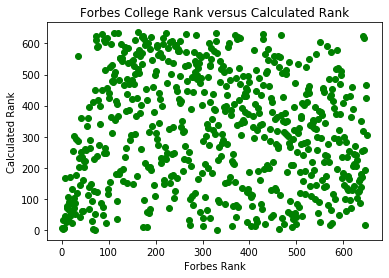

In [129]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig, (ax) = plt.subplots()
ax.set_title("Forbes College Rank versus Calculated Rank")

ax.set_xlabel("Forbes Rank")
ax.set_ylabel("Calculated Rank")
ax.scatter(x,y, color = 'g')

plt.show()
fig.savefig(path2 + 'forbes_ranking_versus_calculated_ranking.png')

In [82]:
earning_sum = forbes_ranking_complete_df.loc[:,['MN_EARN_WNE_P6']].astype('int').sum(axis = 1)

In [83]:
forbes_ranking_complete_df[['MN_EARN_WNE_P6']]

MN_EARN_WNE_P6
0           39400.0
1           40300.0
2           42400.0
3           43100.0
4           36700.0
..              ...
634         49000.0
635         26400.0
636         26000.0
637         36500.0
638         37300.0

[637 rows x 1 columns]

In [84]:
forbes_ranking_complete_df['UGDS']

0      13186.0
1       7458.0
2      32177.0
3      24147.0
4       1265.0
        ...   
634    33495.0
635      320.0
636      808.0
637    13639.0
638    17661.0
Name: UGDS, Length: 637, dtype: float64

In [85]:
(forbes_ranking_complete_df['OVERALL_YR6_N'].astype('int') / forbes_ranking_complete_df['UGDS'].astype('int'))

0      0.196420
1      0.151381
2      0.135780
3      0.117903
4      0.193676
         ...   
634    0.161845
635    0.346875
636    0.158416
637    0.179045
638    0.216183
Length: 637, dtype: float64

In [86]:
filtered_ranking_4_year_df.dtypes.to_list()

[dtype('int64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float6

In [87]:
filtered_ranking_4_year_df.columns

Index(['Rank', 'CIP01BACHL', 'CIP04BACHL', 'CIP05BACHL', 'CIP26BACHL',
       'CIP52BACHL', 'CIP09BACHL', 'CIP10BACHL', 'CIP11BACHL', 'CIP46BACHL',
       ...
       'Alumni Salary', 'Acceptance Rate', 'SAT Lower', 'SAT Upper',
       'ACT Lower', 'ACT Upper', '10%_cut', '5%_cut', '20%_cut', '50%_cut'],
      dtype='object', length=128)

In [88]:
#begin randomforest classifier work
X = filtered_ranking_4_year_df.drop(columns = ['INSTNM', 'Rank', '10%_cut', '5%_cut', '20%_cut', '50%_cut'])
column_list = X.columns.to_list()

In [89]:
#This is an awesome tool!!!!!!!!!!!!!!!!!!!!!!!!
X.select_dtypes(include = object)

Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]

[639 rows x 0 columns]

In [90]:
bool_list = (X.dtypes == object).to_list()

In [91]:
bool_list

[False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False]

In [92]:
# here we need to choose either 10%_cut or 5%_cut.  Choose 10% first then redo with 5%
y = filtered_ranking_4_year_df['20%_cut']
y

0      3
1      3
2      1
3      1
4      3
      ..
634    0
635    4
636    2
637    3
638    3
Name: 20%_cut, Length: 639, dtype: int64

In [93]:
print(X.shape, y.shape)

(639, 122) (639,)


In [94]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = .4)

In [95]:
# random forest generator classifier
from sklearn.ensemble import RandomForestClassifier

In [96]:
rf = RandomForestClassifier()
rf_a = rf.fit(X_train, y_train)
rf_a.score(X_test, y_test)

0.578125

In [97]:
# We can sort the features by their importance
importance_a = sorted(zip(rf_a.feature_importances_, column_list), reverse=True)
importance_a

[(0.04840370158835629, 'SAT Lower'),
 (0.04585413709183311, 'Alumni Salary'),
 (0.044050807561412074, 'SAT Upper'),
 (0.03960848316526817, 'ACT Lower'),
 (0.03405015677202526, 'INEXPFTE'),
 (0.03246088474675963, 'Total Annual Cost'),
 (0.032016192305263695, 'TUITFTE'),
 (0.030091425538735544, 'ACT Upper'),
 (0.028393448575028114, 'PCTFLOAN'),
 (0.025347510666149257, 'Acceptance Rate'),
 (0.022318838589198513, 'UGDS_NRA'),
 (0.021738191562046528, 'UGDS_ASIAN'),
 (0.021306253988656283, 'CCUGPROF'),
 (0.02098476119245725, 'Net Price'),
 (0.019437157277002223, 'Average Grant Aid'),
 (0.018500832396874438, 'PCIP52'),
 (0.015943603535016695, 'PCIP45'),
 (0.015579558990732633, 'SCUGFFN_POOLED'),
 (0.015243719110455809, 'PCIP27'),
 (0.014378846602580275, 'PCIP51'),
 (0.014342282610207981, 'UGDS_BLACK'),
 (0.013795257111697169, 'UGDS'),
 (0.013399407274092156, 'Undergraduate Population'),
 (0.012349990682857961, 'UGDS_AIAN'),
 (0.011954440143183356, 'UGDS_WHITE'),
 (0.011876220392129178, 'UGDS_

In [98]:
column_list_b = []
for tuple in importance_a:
    if tuple[0] > .001:
        column_list_b.append(tuple[1])
X_a = X[column_list_b]

In [99]:
X_a

SAT Lower  Alumni Salary  SAT Upper  ACT Lower  INEXPFTE  \
0        990.0        87200.0     1370.0       21.0   16454.0   
1       1080.0       103900.0     1330.0       25.0    9242.0   
2       1050.0        97400.0     1280.0       23.0   10770.0   
3       1130.0       104500.0     1310.0       24.0   11058.0   
4       1030.0        88300.0     1260.0       23.0   10356.0   
..         ...            ...        ...        ...       ...   
634     1150.0       110000.0     1380.0       25.0   19269.0   
635     1190.0            0.0     1350.0       23.0   15861.0   
636     1190.0        86500.0     1380.0       25.0   15188.0   
637     1060.0        80000.0     1210.0       21.0    6290.0   
638      910.0        85600.0     1130.0       20.0    6267.0   

     Total Annual Cost  TUITFTE  ACT Upper  PCTFLOAN  Acceptance Rate  ...  \
0                36800  13177.0       28.0    0.5127             92.0  ...   
1                36881   8677.0       31.0    0.4192             81.0  ...   
2                46744  14198.0       32.0    0.3863             53.0  ...   
3                49954  15908.0       30.0    0.3169             84.0  ...   
4                52414  11383.0       29.0    0.4567             62.0  ...   
..                 ...      ...        ...       ...              ...  ...   
634              41614  16369.0       31.0    0.2909             57.0  ...   
635              65456  12834.0       32.0    0.5062             63.0  ...   
636              43678    953.0       30.0    0.3174             69.0  ...   
637              39434   5059.0       25.0    0.3925             64.0  ...   
638              28094   4850.0       25.0    0.3289             78.0  ...   

     PCIP10  CIP42BACHL  SCHTYPE  CIP19BACHL  PCIP39  CIP15BACHL  CIP54BACHL  \
0       0.0         1.0      1.0         0.0     0.0         0.0         1.0   
1       0.0         1.0      1.0         0.0     0.0         0.0         1.0   
2       0.0         1.0      1.0         2.0     0.0         0.0         1.0   
3       0.0         1.0      1.0         1.0     0.0         0.0         1.0   
4       0.0         1.0      2.0         0.0     0.0         0.0         1.0   
..      ...         ...      ...         ...     ...         ...         ...   
634     0.0         1.0      1.0         1.0     0.0         1.0         1.0   
635     0.0         0.0      2.0         0.0     0.0         0.0         0.0   
636     0.0         0.0      1.0         0.0     0.0         0.0         0.0   
637     0.0         1.0      1.0         0.0     0.0         0.0         1.0   
638     0.0         1.0      1.0         0.0     0.0         0.0         1.0   

     PCIP49  CIP22BACHL  CIP23BACHL  
0    0.0000         0.0         1.0  
1    0.0000         0.0         1.0  
2    0.0000         0.0         1.0  
3    0.0002         0.0         1.0  
4    0.0000         0.0         1.0  
..      ...         ...         ...  
634  0.0119         0.0         1.0  
635  0.0000         0.0         0.0  
636  0.0000         0.0         0.0  
637  0.0000         2.0         1.0  
638  0.0000         1.0         1.0  

[639 rows x 91 columns]

In [100]:
rf_a.base_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [101]:
# Create the RandomizedSearchCV model
from sklearn.model_selection import RandomizedSearchCV# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
#criterion
criterion = ['gini', 'entropy']
# Maximum number of levels in tree
ccp_alpha = [0., 2., 3., 4., 5.]
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
#impurity decrease
impurity_decrease = [0, 1, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4, 8]
# Method of selecting samples for training each tree
bootstrap = [True, False]# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'criterion' : criterion,
               'ccp_alpha' : ccp_alpha,
               'min_impurity_decrease' : impurity_decrease,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
                'oob_score': [True, False]}
random_grid

{'n_estimators': [100, 311, 522, 733, 944, 1155, 1366, 1577, 1788, 2000],
 'criterion': ['gini', 'entropy'],
 'ccp_alpha': [0.0, 2.0, 3.0, 4.0, 5.0],
 'min_impurity_decrease': [0, 1, 5, 10],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 4, 8],
 'bootstrap': [True, False],
 'oob_score': [True, False]}

In [102]:
rf_random = RandomizedSearchCV(estimator = rf_a, param_distributions = random_grid, cv = 3, verbose = 2, n_iter = 200,  n_jobs = -1)

In [103]:
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 200 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   34.1s
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:  2.4min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [104]:
rf_random.score(X_test, y_test)

0.5859375

In [105]:
rf_random.best_params_

{'oob_score': False,
 'n_estimators': 1577,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'min_impurity_decrease': 0,
 'max_features': 'auto',
 'max_depth': 10,
 'criterion': 'gini',
 'ccp_alpha': 0.0,
 'bootstrap': True}

In [106]:
model_best = RandomForestClassifier(**rf_random.best_params_)

In [107]:

random_forest = model_best.fit(X_train, y_train)
score = random_forest.score(X_test, y_test)
score

0.5572916666666666

In [108]:
# We can sort the features by their importance
importance_best_model = sorted(zip(random_forest.feature_importances_, column_list), reverse=True)
importance_best_model

[(0.06253672203301944, 'SAT Lower'),
 (0.05369595499324241, 'Alumni Salary'),
 (0.05284528619818387, 'ACT Lower'),
 (0.04914680306964391, 'INEXPFTE'),
 (0.04378397548954373, 'SAT Upper'),
 (0.04287279046783276, 'ACT Upper'),
 (0.04251518900237057, 'Total Annual Cost'),
 (0.034758829201168046, 'Acceptance Rate'),
 (0.031103715712517983, 'TUITFTE'),
 (0.030217554364354686, 'PCTFLOAN'),
 (0.022599005099774753, 'CCUGPROF'),
 (0.021565388350303354, 'Average Grant Aid'),
 (0.02148656842732181, 'UGDS_ASIAN'),
 (0.021460539207129786, 'Net Price'),
 (0.019007560902599224, 'UGDS_BLACK'),
 (0.01768175476546921, 'UGDS_NRA'),
 (0.01759482885531081, 'PCIP52'),
 (0.017040707729938192, 'PCIP45'),
 (0.0158653126924749, 'PCIP27'),
 (0.014559649246999084, 'SCUGFFN_POOLED'),
 (0.013573698470613738, 'UGDS'),
 (0.013265854766781705, 'PCIP38'),
 (0.012844201577197062, 'Student Population'),
 (0.011625678260159818, 'Undergraduate Population'),
 (0.011095607934215344, 'PPTUG_EF'),
 (0.010859988788604119, 'LONG

In [109]:
column_list_final = []
for tuple in importance_a:
    if tuple[0] > .01:
        column_list_final.append(tuple[1])
X_final = X[column_list_final]

In [110]:
X_final

SAT Lower  Alumni Salary  SAT Upper  ACT Lower  INEXPFTE  \
0        990.0        87200.0     1370.0       21.0   16454.0   
1       1080.0       103900.0     1330.0       25.0    9242.0   
2       1050.0        97400.0     1280.0       23.0   10770.0   
3       1130.0       104500.0     1310.0       24.0   11058.0   
4       1030.0        88300.0     1260.0       23.0   10356.0   
..         ...            ...        ...        ...       ...   
634     1150.0       110000.0     1380.0       25.0   19269.0   
635     1190.0            0.0     1350.0       23.0   15861.0   
636     1190.0        86500.0     1380.0       25.0   15188.0   
637     1060.0        80000.0     1210.0       21.0    6290.0   
638      910.0        85600.0     1130.0       20.0    6267.0   

     Total Annual Cost  TUITFTE  ACT Upper  PCTFLOAN  Acceptance Rate  ...  \
0                36800  13177.0       28.0    0.5127             92.0  ...   
1                36881   8677.0       31.0    0.4192             81.0  ...   
2                46744  14198.0       32.0    0.3863             53.0  ...   
3                49954  15908.0       30.0    0.3169             84.0  ...   
4                52414  11383.0       29.0    0.4567             62.0  ...   
..                 ...      ...        ...       ...              ...  ...   
634              41614  16369.0       31.0    0.2909             57.0  ...   
635              65456  12834.0       32.0    0.5062             63.0  ...   
636              43678    953.0       30.0    0.3174             69.0  ...   
637              39434   5059.0       25.0    0.3925             64.0  ...   
638              28094   4850.0       25.0    0.3289             78.0  ...   

     PCIP09  PPTUG_EF  PCIP11  OPEID6_y  PCIP38  PCIP42  PCIP50  UGDS_HISP  \
0    0.0375    0.2425  0.0139      1052  0.0064  0.0602  0.0339     0.0334   
1    0.0194    0.1443  0.0590      1055  0.0024  0.0202  0.0380     0.0528   
2    0.0973    0.0836  0.0132      1051  0.0016  0.0376  0.0244     0.0499   
3    0.0566    0.0791  0.0098      1009  0.0021  0.0279  0.0296     0.0342   
4    0.0284    0.0040  0.0000      1012  0.0213  0.1028  0.1099     0.0213   
..      ...       ...     ...       ...     ...     ...     ...        ...   
634  0.0224    0.0494  0.0739      1825  0.0016  0.0211  0.0154     0.0515   
635  0.0000    0.0438  0.0000      2093  0.0000  0.0000  0.0000     0.1281   
636  0.0000    0.0000  0.0000     39574  0.0000  0.0000  0.0000     0.1733   
637  0.0820    0.1910  0.0000     32553  0.0037  0.0565  0.0134     0.2134   
638  0.0275    0.2672  0.0331      1585  0.0000  0.0426  0.0203     0.1334   

     PCIP26  PCIP54  
0    0.0876  0.0100  
1    0.0436  0.0105  
2    0.0332  0.0124  
3    0.1108  0.0087  
4    0.1489  0.0319  
..      ...     ...  
634  0.0293  0.0045  
635  0.0000  0.0000  
636  0.0000  0.0000  
637  0.0452  0.0074  
638  0.0380  0.0190  

[639 rows x 42 columns]

In [111]:
random_forest_summary_forbes_best_df = pd.DataFrame()
for tuple in importance_best_model:
    print(tuple[0])
    print(tuple[1])
    developer_name = column_heading_df.loc[column_heading_df['VARIABLE NAME'] == tuple[1], 'developer-friendly name'].to_numpy()
    data_element = column_heading_df.loc[column_heading_df['VARIABLE NAME'] == tuple[1], 'NAME OF DATA ELEMENT']
    dev_category = column_heading_df.loc[column_heading_df['VARIABLE NAME'] == tuple[1], 'dev-category']

    random_forest_summary_forbes_best_df = random_forest_summary_forbes_best_df.append({'VARIABLE NAME': tuple[1], 'importance' : tuple[0], 'developer-friendly-name': developer_name, 'NAME OF DATA ELEMENT': data_element, 'dev-category': dev_category}, ignore_index = True)

0.06253672203301944
SAT Lower
0.05369595499324241
Alumni Salary
0.05284528619818387
ACT Lower
0.04914680306964391
INEXPFTE
0.04378397548954373
SAT Upper
0.04287279046783276
ACT Upper
0.04251518900237057
Total Annual Cost
0.034758829201168046
Acceptance Rate
0.031103715712517983
TUITFTE
0.030217554364354686
PCTFLOAN
0.022599005099774753
CCUGPROF
0.021565388350303354
Average Grant Aid
0.02148656842732181
UGDS_ASIAN
0.021460539207129786
Net Price
0.019007560902599224
UGDS_BLACK
0.01768175476546921
UGDS_NRA
0.01759482885531081
PCIP52
0.017040707729938192
PCIP45
0.0158653126924749
PCIP27
0.014559649246999084
SCUGFFN_POOLED
0.013573698470613738
UGDS
0.013265854766781705
PCIP38
0.012844201577197062
Student Population
0.011625678260159818
Undergraduate Population
0.011095607934215344
PPTUG_EF
0.010859988788604119
LONGITUDE
0.010605794547188095
PCIP51
0.01028352969233094
PCIP13
0.010090090146457899
UGDS_AIAN
0.009813608758682752
PCIP16
0.009782549940932823
PCIP40
0.009414550432260532
PCIP11
0.0

In [112]:
random_forest_summary_forbes_best_df.head(20).columns.to_list()

['NAME OF DATA ELEMENT',
 'VARIABLE NAME',
 'dev-category',
 'developer-friendly-name',
 'importance']

In [113]:
random_forest_summary_forbes_best_df_20 = random_forest_summary_forbes_best_df[['VARIABLE NAME', 'importance','NAME OF DATA ELEMENT',   \
       'developer-friendly-name']].head(20)

In [114]:
random_forest_summary_forbes_best_df_20

VARIABLE NAME  importance  \
0           SAT Lower    0.062537   
1       Alumni Salary    0.053696   
2           ACT Lower    0.052845   
3            INEXPFTE    0.049147   
4           SAT Upper    0.043784   
5           ACT Upper    0.042873   
6   Total Annual Cost    0.042515   
7     Acceptance Rate    0.034759   
8             TUITFTE    0.031104   
9            PCTFLOAN    0.030218   
10           CCUGPROF    0.022599   
11  Average Grant Aid    0.021565   
12         UGDS_ASIAN    0.021487   
13          Net Price    0.021461   
14         UGDS_BLACK    0.019008   
15           UGDS_NRA    0.017682   
16             PCIP52    0.017595   
17             PCIP45    0.017041   
18             PCIP27    0.015865   
19     SCUGFFN_POOLED    0.014560   

                                 NAME OF DATA ELEMENT  \
0   Series([], Name: NAME OF DATA ELEMENT, dtype: ...   
1   Series([], Name: NAME OF DATA ELEMENT, dtype: ...   
2   Series([], Name: NAME OF DATA ELEMENT, dtype: ...   
3   337    Instructional expenditures per full-tim...   
4   Series([], Name: NAME OF DATA ELEMENT, dtype: ...   
5   Series([], Name: NAME OF DATA ELEMENT, dtype: ...   
6   Series([], Name: NAME OF DATA ELEMENT, dtype: ...   
7   Series([], Name: NAME OF DATA ELEMENT, dtype: ...   
8   340    Net tuition revenue per full-time equiv...   
9   102    Percent of all undergraduate students r...   
10  325    Carnegie Classification -- undergraduat...   
11  Series([], Name: NAME OF DATA ELEMENT, dtype: ...   
12  390    Total share of enrollment of undergradu...   
13  Series([], Name: NAME OF DATA ELEMENT, dtype: ...   
14  392    Total share of enrollment of undergradu...   
15  397    Total share of enrollment of undergradu...   
16  43    Percentage of degrees awarded in Busines...   
17  73    Percentage of degrees awarded in Social ...   
18  60    Percentage of degrees awarded in Mathema...   
19  365    Number of full-time, first-time degree/...   

                              developer-friendly-name  
0                                                  []  
1                                                  []  
2                                                  []  
3                 [instructional_expenditure_per_fte]  
4                                                  []  
5                                                  []  
6                                                  []  
7                                                  []  
8                           [tuition_revenue_per_fte]  
9                                 [federal_loan_rate]  
10                               [carnegie_undergrad]  
11                                                 []  
12                [demographics.race_ethnicity.asian]  
13                                                 []  
14                [demographics.race_ethnicity.black]  
15   [demographics.race_ethnicity.non_resident_alien]  
16            [program_percentage.business_marketing]  
17                [program_percentage.social_science]  
18                   [program_percentage.mathematics]  
19  [ftft_undergrads_with_pell_grant_or_federal_st...

In [115]:
random_forest_summary_forbes_best_df_20 = random_forest_summary_forbes_best_df_20.append(pd.DataFrame(data = ['model_score ='+str(score)], columns = ['VARIABLE NAME']), ignore_index = False)

In [116]:
pd.DataFrame(data = ['test'])

0
0  test

In [117]:
random_forest_summary_forbes_best_df_20

VARIABLE NAME  importance  \
0                         SAT Lower    0.062537   
1                     Alumni Salary    0.053696   
2                         ACT Lower    0.052845   
3                          INEXPFTE    0.049147   
4                         SAT Upper    0.043784   
5                         ACT Upper    0.042873   
6                 Total Annual Cost    0.042515   
7                   Acceptance Rate    0.034759   
8                           TUITFTE    0.031104   
9                          PCTFLOAN    0.030218   
10                         CCUGPROF    0.022599   
11                Average Grant Aid    0.021565   
12                       UGDS_ASIAN    0.021487   
13                        Net Price    0.021461   
14                       UGDS_BLACK    0.019008   
15                         UGDS_NRA    0.017682   
16                           PCIP52    0.017595   
17                           PCIP45    0.017041   
18                           PCIP27    0.015865   
19                   SCUGFFN_POOLED    0.014560   
0   model_score =0.5572916666666666         NaN   

                                 NAME OF DATA ELEMENT  \
0   Series([], Name: NAME OF DATA ELEMENT, dtype: ...   
1   Series([], Name: NAME OF DATA ELEMENT, dtype: ...   
2   Series([], Name: NAME OF DATA ELEMENT, dtype: ...   
3   337    Instructional expenditures per full-tim...   
4   Series([], Name: NAME OF DATA ELEMENT, dtype: ...   
5   Series([], Name: NAME OF DATA ELEMENT, dtype: ...   
6   Series([], Name: NAME OF DATA ELEMENT, dtype: ...   
7   Series([], Name: NAME OF DATA ELEMENT, dtype: ...   
8   340    Net tuition revenue per full-time equiv...   
9   102    Percent of all undergraduate students r...   
10  325    Carnegie Classification -- undergraduat...   
11  Series([], Name: NAME OF DATA ELEMENT, dtype: ...   
12  390    Total share of enrollment of undergradu...   
13  Series([], Name: NAME OF DATA ELEMENT, dtype: ...   
14  392    Total share of enrollment of undergradu...   
15  397    Total share of enrollment of undergradu...   
16  43    Percentage of degrees awarded in Busines...   
17  73    Percentage of degrees awarded in Social ...   
18  60    Percentage of degrees awarded in Mathema...   
19  365    Number of full-time, first-time degree/...   
0                                                 NaN   

                              developer-friendly-name  
0                                                  []  
1                                                  []  
2                                                  []  
3                 [instructional_expenditure_per_fte]  
4                                                  []  
5                                                  []  
6                                                  []  
7                                                  []  
8                           [tuition_revenue_per_fte]  
9                                 [federal_loan_rate]  
10                               [carnegie_undergrad]  
11                                                 []  
12                [demographics.race_ethnicity.asian]  
13                                                 []  
14                [demographics.race_ethnicity.black]  
15   [demographics.race_ethnicity.non_resident_alien]  
16            [program_percentage.business_marketing]  
17                [program_percentage.social_science]  
18                   [program_percentage.mathematics]  
19  [ftft_undergrads_with_pell_grant_or_federal_st...  
0                                                 NaN

In [118]:
random_forest_summary_forbes_best_df_20.to_csv(path2 + 'random_forest_summary_forbes_df.csv')

In [119]:
column_list = random_forest_summary_forbes_best_df['VARIABLE NAME'].to_list()

In [120]:
# Extract single tree
estimator = model_best.estimators_[0]

In [121]:
from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = column_list,
                class_names = True,
                rounded = True, proportion = False,
                node_ids = True,
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'random_forest_summary_forbes_best_tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'random_forest_summary_forbes_best_tree.png')

In [122]:
from sklearn.metrics import confusion_matrix
y_predict = model_best.predict(X_test)
confusion_matrix(y_test, y_predict)

array([[61, 19,  0,  0,  0],
       [ 4, 47, 25,  0,  0],
       [ 0, 17, 33,  8, 16],
       [ 0,  4, 32,  9, 40],
       [ 0,  0,  2,  3, 64]], dtype=int64)

<Figure size 432x288 with 0 Axes>

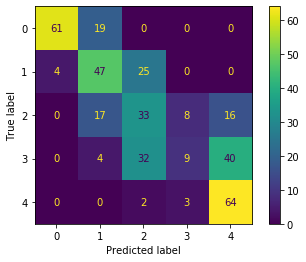

In [123]:
from sklearn.metrics import plot_confusion_matrix
fig = plt.figure()
plot_confusion_matrix(model_best, X_test, y_test)
plt.show()
fig.savefig(path2 + 'school_ranking_confusion_matrix.png', format = 'png' , bbox_inches='tight')